## 📥 Step 1: Load the Dataset

- Imported essential Python libraries: `pandas`, `numpy`, and `matplotlib`.
- Loaded the IBM HR Analytics dataset using `pd.read_csv()`.
- Displayed the first few rows using `df.head()` to understand the structure and columns.
- Checked for null or missing values using `df.isnull().sum()`.



In [7]:
import pandas as pd

# Load from local upload
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Preview
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 📊 Step 2: Exploratory Data Analysis (EDA)

- Checked the basic structure and types using `df.info()` and `df.describe()`.
- Explored target class distribution (`Attrition`) using `value_counts()` and visualized it with `seaborn`.
- Plotted bar charts and histograms to understand categorical and numerical features.
- Used correlation matrix and heatmap to identify relationships between numerical features.


In [8]:
# Check shape of the dataset
print("Dataset Shape:", df.shape)

# View column names
print("\nColumn Names:")
print(df.columns.tolist())

# Dataset information
print("\nDataset Info:")
df.info()

# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())

# Check class distribution of Attrition
print("\nAttrition Value Counts:")
print(df['Attrition'].value_counts())

# Explore a few key categorical features
print("\nJob Roles:")
print(df['JobRole'].value_counts())

print("\nOverTime:")
print(df['OverTime'].value_counts())


Dataset Shape: (1470, 35)

Column Names:
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2

## 📥 Step 3: cleaning and preprocessing

We'll upload the HR Analytics dataset and preview its contents.
and we'll scale and preprocessing


In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Separate target and features
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Convert target to binary
y = y.map({"Yes": 1, "No": 0})

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop='first'), categorical_cols),
    ("num", StandardScaler(), numerical_cols)
])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)



Step 4: Exploratory Data Analysis (EDA)

In this step, we explore the dataset visually to find patterns and relationships that may help us understand why employees leave the company.

/tmp/ipython-input-11-1817129861.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


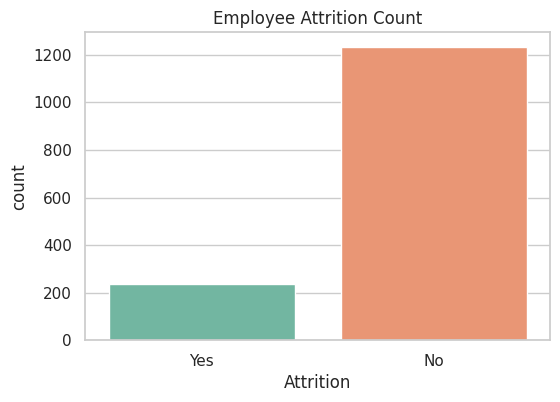

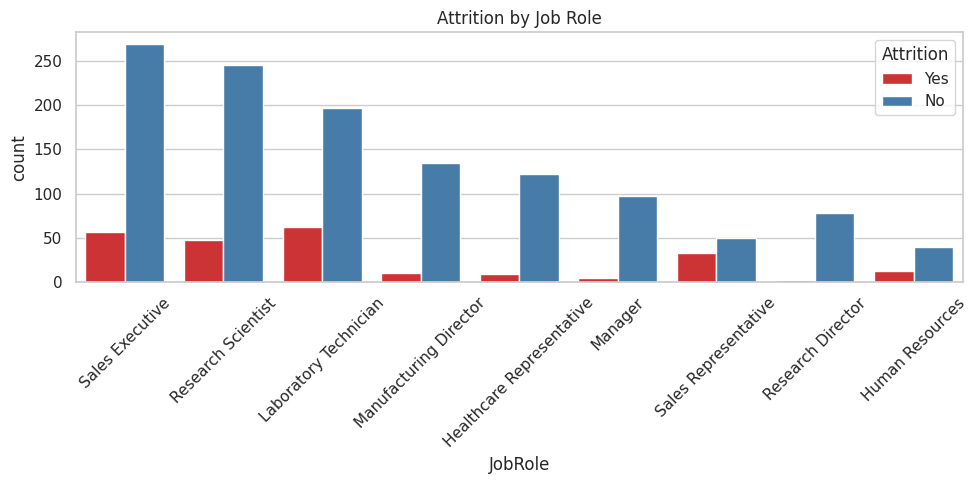

/tmp/ipython-input-11-1817129861.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='Pastel1')


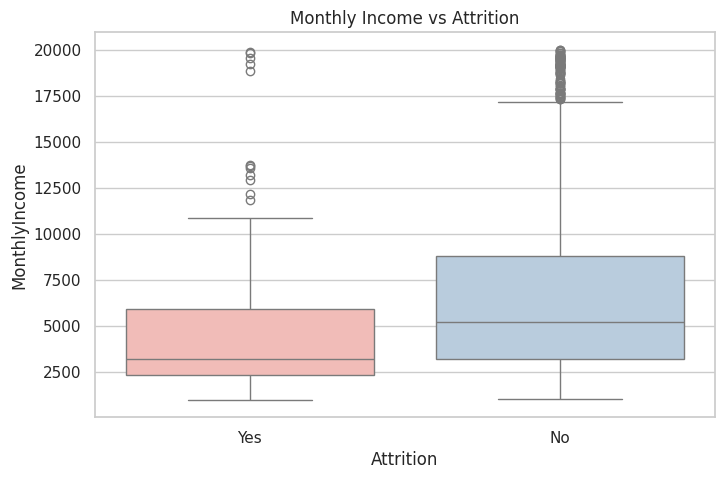

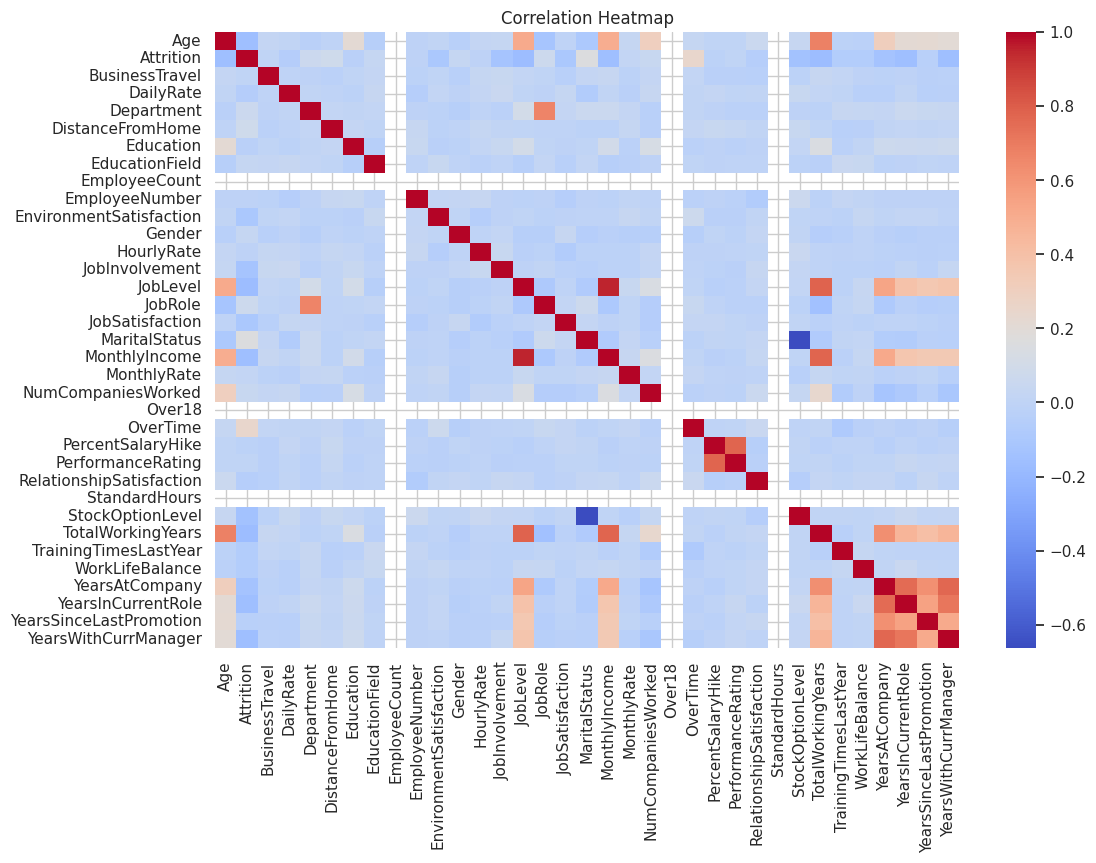

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Countplot of Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title("Employee Attrition Count")
plt.show()

# 2. Attrition by Job Role
plt.figure(figsize=(10, 5))
sns.countplot(x='JobRole', hue='Attrition', data=df, palette='Set1')
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Boxplot - Monthly Income vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='Pastel1')
plt.title("Monthly Income vs Attrition")
plt.show()

# 4. Heatmap - Correlation Matrix
plt.figure(figsize=(12, 8))
corr = df_encoded.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Step 5: Build Machine Learning Models

In this step, we build three classification models: Logistic Regression, Random Forest, and XGBoost to predict employee attrition. We compare their performance using classification reports.

- Logistic Regression: A basic linear model
- Random Forest: An ensemble of decision trees
- XGBoost: A powerful boosting-based model


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Use the resampled (processed) data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))




Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       250
           1       0.76      0.82      0.79       244

    accuracy                           0.78       494
   macro avg       0.78      0.78      0.78       494
weighted avg       0.79      0.78      0.78       494

Random Forest:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       250
           1       0.96      0.90      0.93       244

    accuracy                           0.93       494
   macro avg       0.94      0.93      0.93       494
weighted avg       0.94      0.93      0.93       494



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:14:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       250
           1       0.95      0.89      0.92       244

    accuracy                           0.93       494
   macro avg       0.93      0.92      0.92       494
weighted avg       0.93      0.93      0.93       494



### Step 6 – Evaluate Performance

We evaluated each model using:

- **Accuracy** – Overall correctness
- **Precision** – How many predicted leavers actually left
- **Recall** – How many actual leavers were correctly predicted *(important to minimize false negatives)*
- **F1-score** – Balance between precision and recall
- **Confusion Matrix** – To visualize true/false positives/negatives



In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(name, y_test, y_pred):
    print(f"🔍 {name} Evaluation:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 40)

# Evaluate each model
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


🔍 Logistic Regression Evaluation:
Accuracy : 0.7834008097165992
Precision: 0.7604562737642585
Recall   : 0.819672131147541
F1 Score : 0.7889546351084813
Confusion Matrix:
 [[187  63]
 [ 44 200]]
----------------------------------------
🔍 Random Forest Evaluation:
Accuracy : 0.9331983805668016
Precision: 0.9647577092511013
Recall   : 0.8975409836065574
F1 Score : 0.9299363057324841
Confusion Matrix:
 [[242   8]
 [ 25 219]]
----------------------------------------
🔍 XGBoost Evaluation:
Accuracy : 0.9251012145748988
Precision: 0.9519650655021834
Recall   : 0.8934426229508197
F1 Score : 0.9217758985200846
Confusion Matrix:
 [[239  11]
 [ 26 218]]
----------------------------------------


### Step 7 – Interpret Results

We used feature importance from the Random Forest model to identify which features most influence attrition. This helps HR focus on key areas like:

- Overtime
- Monthly Income
- Job Satisfaction
- Years at Company

These insights can guide retention strategies like offering fair compensation, work-life balance, or role development.


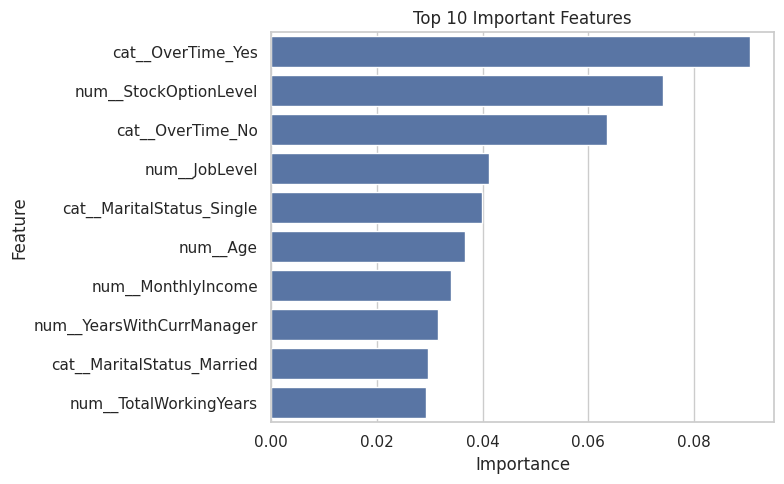

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Drop target and remove only columns that exist
drop_cols = ['Attrition', 'EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount']
existing_cols = [col for col in drop_cols if col in df.columns]
X = df.drop(existing_cols, axis=1)
y = df['Attrition'].map({'Yes': 1, 'No': 0})

# Identify column types
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing
ct = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
    ('num', StandardScaler(), num_cols)
])

X_encoded = ct.fit_transform(X)
feature_names = ct.get_feature_names_out()

# SMOTE + Train-test split
X_res, y_res = SMOTE(random_state=42).fit_resample(X_encoded, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importances
importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()